# Explore here

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import math
import utils as eda
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from pickle import dump
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
total_data = pd.read_csv(url, sep= ',')  


total_data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
target = 'Outcome'
# Variables numéricas
numericas = total_data.select_dtypes(include=['number']).columns.tolist()
print("Variables numéricas:", numericas)

# Variables no numéricas (categóricas, texto, etc.)
no_numericas = total_data.select_dtypes(exclude=['number']).columns.tolist()
print("Variables no numéricas:", no_numericas)

Variables numéricas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Variables no numéricas: []


In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# VERIFICO SI HAY DATOS NULOS 
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
duplicados = total_data[total_data.duplicated(keep=False)]

print(duplicados)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [8]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


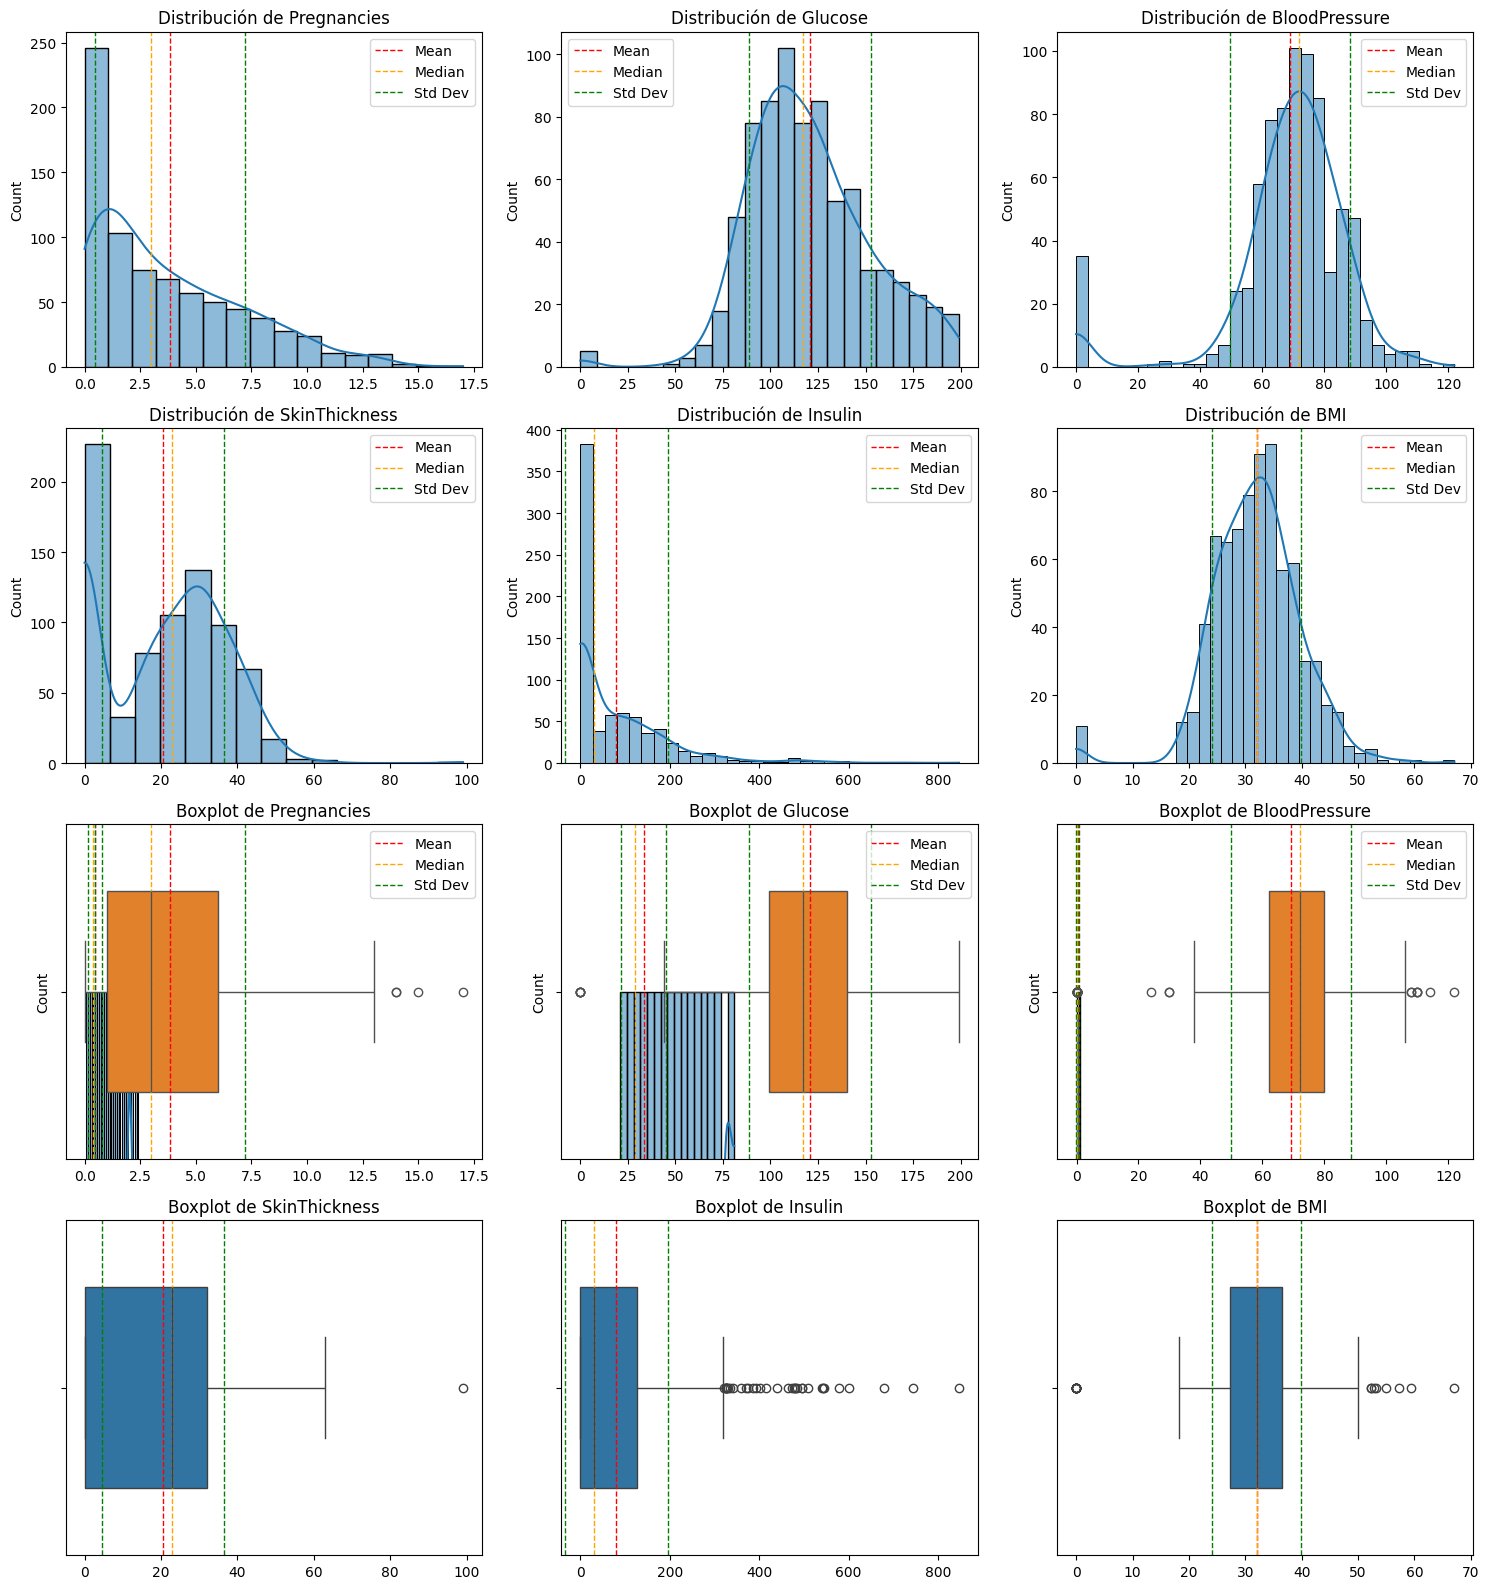

In [9]:
# ANALISIS VARIABLES NUMERICAS

eda.plot_numerical_data(total_data)


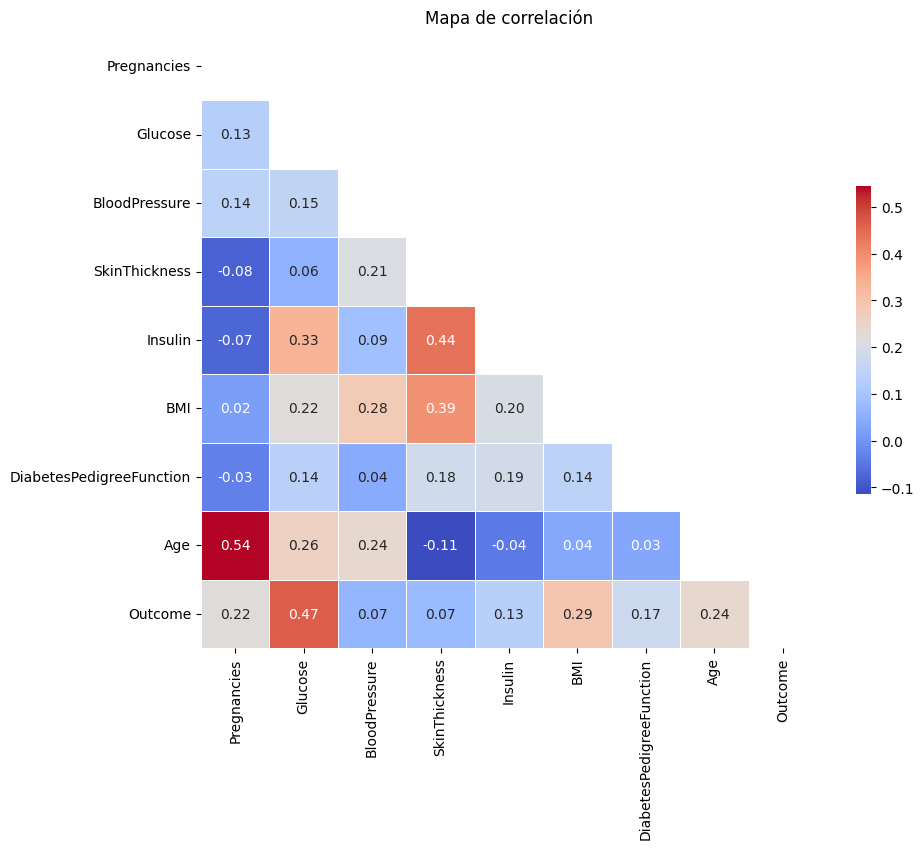

In [10]:
# MAPA DE DE CORRELACION EN VARIABLES NUMENICAS
eda.heatmap_correlation(total_data)

Correlaciones con la variable objetivo 'Outcome':
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64


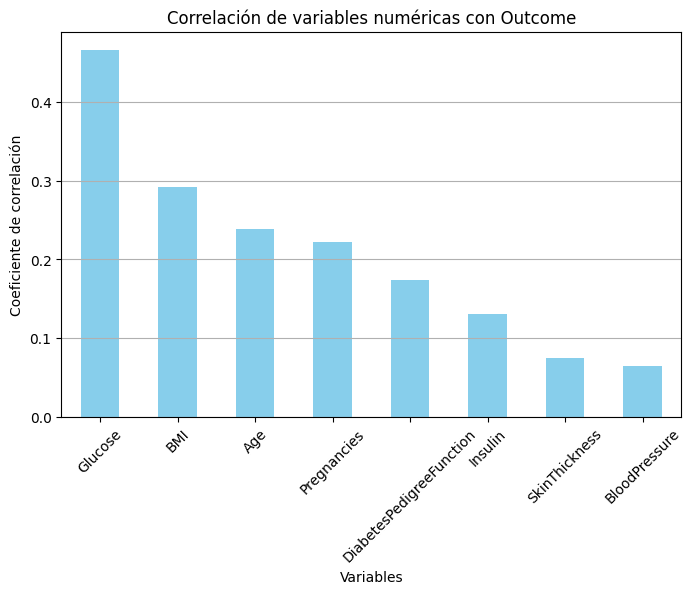

In [11]:
#CORRELACION ENTRE VARIABLES NUMERICAS Y LA TARGET
eda.correlation_num_target(total_data, target)

In [12]:
# DATASET TOTAL_DATA SIN OUTLIERS

total_data_no_outliers=total_data.copy()

def adjust_outliers(data, target):
    df_adj = data.copy()
    numeric_cols = df_adj.select_dtypes(include=['float64', 'int64']).columns.drop(target)
    for col in numeric_cols:
        Q1 = df_adj[col].quantile(0.25)
        Q3 = df_adj[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_adj[col] = np.where(df_adj[col] < lower_bound, lower_bound, df_adj[col])
        df_adj[col] = np.where(df_adj[col] > upper_bound, upper_bound, df_adj[col])
    return df_adj

total_data_no_outliers = adjust_outliers(total_data, target)
total_data_no_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


In [13]:
# DATASET TRAIN/TEST CON OUTLAIERS
x = total_data.drop(columns=[target])
y = total_data[target]

x_train_total_data, x_test_total_data, _, _ = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train_total_data)
print(x_test_total_data)



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  


In [ ]:
# DATASET TRAIN/TEST SIN OUTLAIERS

x = total_data_no_outliers.drop(columns=[target])
y = total_data_no_outliers[target]

x_train_total_data_no_outliers, x_test_total_data_no_outliers, _, _= train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Tamaño x_train_no_outlaiers:")
print(x_train_total_data_no_outliers, "\n")
print("Tamaño x_test_no_outlaiers:")
print(x_test_total_data_no_outliers, "\n")

Tamaño x_train_no_outlaiers_factorized:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
60           2.0     84.0           35.0            0.0    0.000  13.35   
618          9.0    112.0           82.0           24.0    0.000  28.20   
346          1.0    139.0           46.0           19.0   83.000  28.70   
294          0.0    161.0           50.0            0.0    0.000  21.90   
231          6.0    134.0           80.0           37.0  318.125  46.20   
..           ...      ...            ...            ...      ...    ...   
71           5.0    139.0           64.0           35.0  140.000  28.60   
106          1.0     96.0          107.0            0.0    0.000  22.40   
270         10.0    101.0           86.0           37.0    0.000  45.60   
435          0.0    141.0           35.0            0.0    0.000  42.40   
102          0.0    125.0           96.0            0.0    0.000  22.50   

     DiabetesPedigreeFunction   Age  
60                   